In [1]:
# IMPORTS

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# Define Constants
POOP_DF_COLUMN_DATE='date'
POOP_DF_COLUMN_DATETIME='datetime'
POOP_DF_COLUMN_HOUR='heure'
POOP_DF_COLUMN_DATETIME_OF_DAY='datetime_ofday'
POOP_DF_COLUMN_NATURE='nature'
POOP_DF_VALUE_NATURE_POOP='caca'

In [3]:
# Loading poop data
# data consolidation: Computing poop date and hour of day as datetime
df_poop=pd.read_csv('../data/poop.csv',sep=';')
df_poop[POOP_DF_COLUMN_DATETIME]=df_poop[[POOP_DF_COLUMN_DATE, POOP_DF_COLUMN_HOUR]].apply(lambda x : datetime.strptime('{}T{}'.format(x.iloc[0],x.iloc[1]), "%Y-%m-%dT%H:%M"), axis=1)
_today=datetime.now().strftime("%Y-%m-%d")
df_poop[POOP_DF_COLUMN_DATETIME_OF_DAY]=df_poop[[POOP_DF_COLUMN_HOUR]].apply(lambda x : datetime.strptime('{}T{}'.format(_today,x.iloc[0]), "%Y-%m-%dT%H:%M"), axis=1)

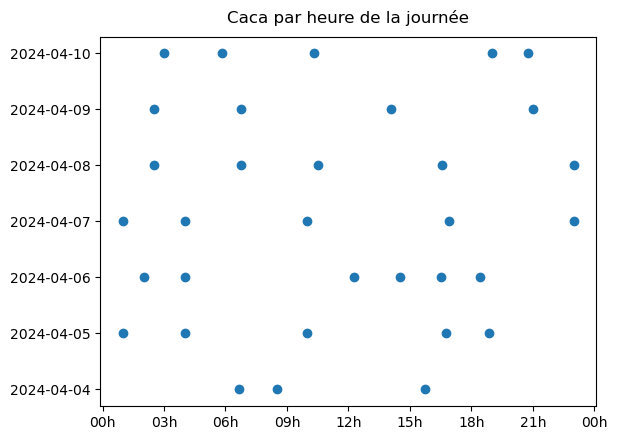

In [4]:
# GRAPH poop by hour of day
# filter on poop oly
df_poop_only=df_poop.loc[df_poop[POOP_DF_COLUMN_NATURE] == POOP_DF_VALUE_NATURE_POOP]
plt.plot(df_poop_only[POOP_DF_COLUMN_DATETIME_OF_DAY],df_poop_only[POOP_DF_COLUMN_DATE],'o')
plt.title('Caca par heure de la journée', pad=10)
hourFormatter=mdates.DateFormatter('%Hh')
plt.gca().xaxis.set_major_formatter(hourFormatter) 